# Project SonicSpectrum

Authors: **Joshua Mukisa**

This Jupyter Notebook contains code dedicated to applying Fast Fourrier Transforms (FFT) to an audio file, and visualising it in a sinusoidal graph.

Audio File Name: **Pirates of the Caribbean - He's a Pirate.mp3**

FFT (Fast Fourier Transform) is an algorithm used to compute the discrete Fourier transform efficiently.

The Discrete Fourier Transform (DFT) is mathematically represented as follows:

$$X_k = \sum_{m=0}^{n-1} x_m \cdot e^{-i \frac{2\pi k m}{n}} \quad \text{for} \quad k = 0, 1, \ldots, n-1$$

In this expression:

- $X_k$ represents the $k$-th element of the DFT output.
- $x_m$ denotes the $m$-th element of the input sequence.
- $e^{-i \frac{2\pi k m}{n}}$ is the complex exponential term, where $e$ is the base of the natural logarithm, $i$ is the imaginary unit, and $\pi$ is the mathematical constant pi.

Additionally, $e^{i\frac{2\pi}{n}}$ corresponds to a primitive $n$-th root of 1. This term is crucial in the computation of the DFT, as it defines the angular frequency associated with each frequency component.


# Import necessary libraries


In [ ]:
import librosa
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import pandas as pd

# Loading and processing audio


In [ ]:
def load_and_process_audio(file_path):
    """
    Load an MP3 file and process it for further signal processing.

    Parameters:
    - file_path (str): Path to the MP3 file.

    Returns:
    - audio_data (np.ndarray): Processed audio data.
    - sr (int): Actual sample rate of the loaded audio.
    """
    # Load the audio file
    audio_data, sr = librosa.load(file_path)

    return audio_data, sr


BASE_DIR = "../data"  # directory containing the sound file
file_name = "Pirates-5secinterval.m4a"  # the name of the sound file

file_path = os.path.join(BASE_DIR, file_name)  # The file path to the sound file
audio_data, sr = load_and_process_audio(
    file_path
)  # Split the sound file into the intensity and sample rate

# Plot frequency spectrum


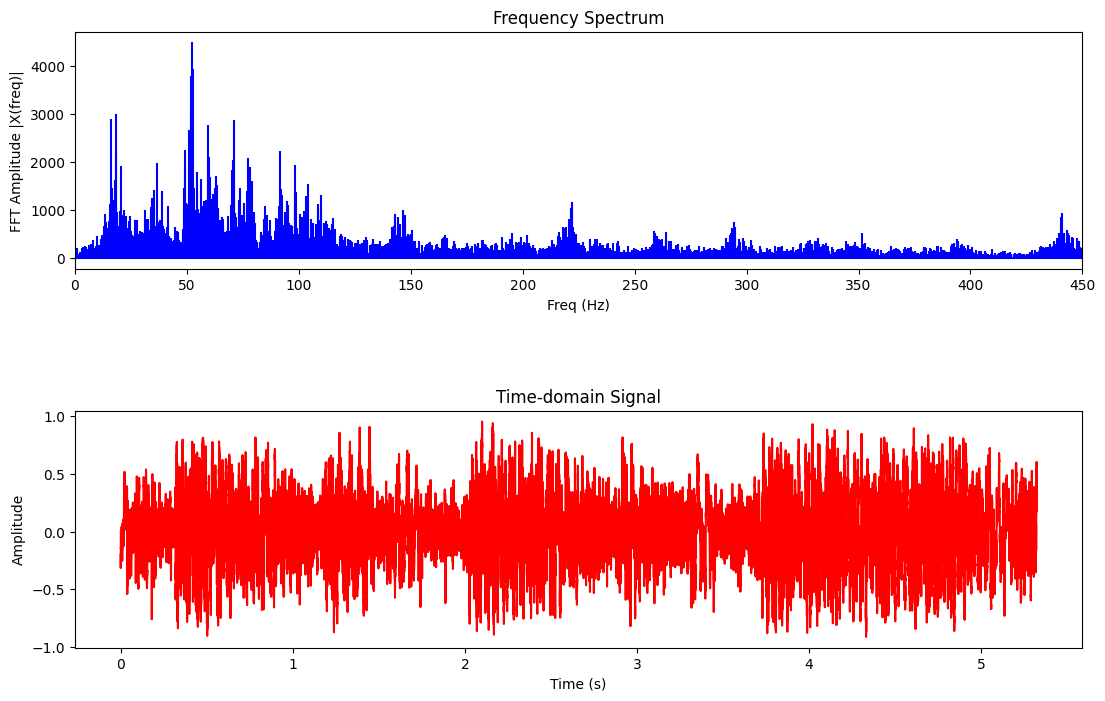

 Frequency   Amplitude  Complex_Number_Amplitude_Value
 15.972406 2901.722032       -2900.949069+  66.972004j
 18.415244 3001.591812        -782.647220+2897.760641j
 51.111698 2660.815472        1432.199261-2242.486177j
 51.675430 3783.564088       -3345.047275+1768.054279j
 51.863341 2673.143776        1827.564023+1950.822233j
 52.051251 3083.064845         213.859958+3075.638593j
 52.239162 4488.680778         696.810571+4434.265458j
 52.427073 2628.260932       -2628.258790+   3.355248j
 52.802894 3932.635825         819.367286-3846.330951j
 59.379767 2776.270321       -2725.018105- 530.992677j
 71.030228 2871.121884       -1227.278114+2595.598062j


In [ ]:
def plot_frequency_spectrum(audio_data, sr):
    """
    Perform FFT on the processed audio data and plot the frequency spectrum.

    Parameters:
    - audio_data (np.ndarray): Processed audio data.
    - sr (int): Sample rate of the audio data.

    Returns:
    None
    """
    # Perform FFT (Fourier Transforms)
    X = fft(audio_data)
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T
    df = pd.DataFrame(
        {"Frequency": freq, "Amplitude": np.abs(X), "Complex_Number_Amplitude_Value": X}
    )
    threshold_percentage = 0.5
    prominent_frequencies = df[
        (df["Frequency"] < 150)
        & (df["Amplitude"] > threshold_percentage * max(np.abs(X)))
    ]

    # Plot frequency spectrum
    plt.figure(figsize=(13, 8))

    # Subplot 2: Frequency Spectrum
    plt.subplot(211)
    plt.stem(freq, np.abs(X), "b", markerfmt=" ", basefmt="-b")
    plt.xlabel("Freq (Hz)")
    plt.ylabel("FFT Amplitude |X(freq)|")
    plt.title("Frequency Spectrum")
    plt.xlim(0, 450)  # Adjust the frequency range as needed

    # Subplot 1: Time-domain Signal
    plt.subplot(212)
    plt.plot(np.arange(len(audio_data)) / sr, audio_data, "r")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Time-domain Signal")

    # Adjust layout for better visualization
    plt.subplots_adjust(hspace=0.6)  # Add spacing between subplots

    # Display the plot
    plt.show()
    print(prominent_frequencies.to_string(index=False))


plot_frequency_spectrum(audio_data, sr)

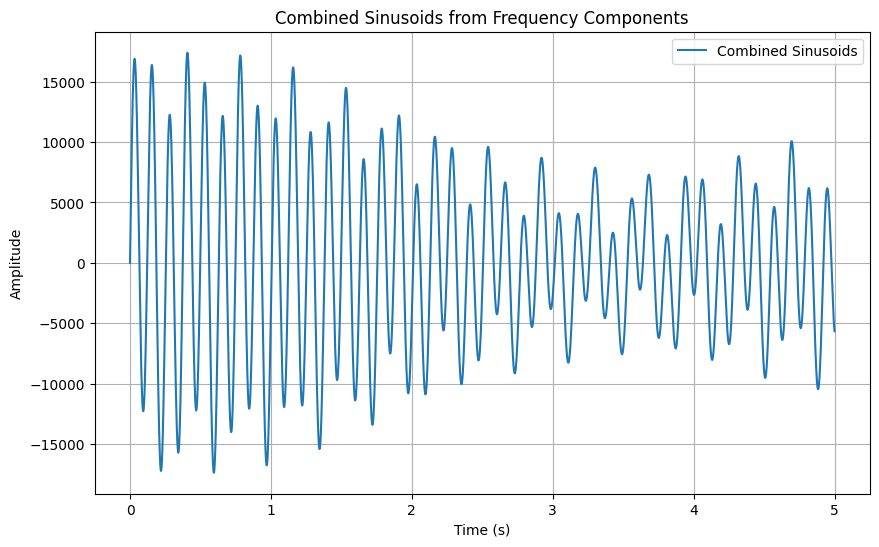

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate and FFT length
sampling_rate = 20050  # samples per second
fft_length = 131072

# Frequencies and amplitudes
frequencies = [52.2, 53, 51.7, 52, 18.4]  # Hz
amplitudes = [4489, 3932, 3784, 3083, 3002]

# Calculate frequency resolution
frequency_resolution = sampling_rate / fft_length

# Calculate angular frequencies
angular_frequencies = [2 * np.pi * f * frequency_resolution for f in frequencies]

# Time array for 5 seconds
t = np.linspace(0, 5, num=5 * sampling_rate)

# Extract sinusoids
sinusoids = np.zeros_like(t)
for i, (amp, omega) in enumerate(zip(amplitudes, angular_frequencies)):
    sinusoids += amp * np.sin(omega * t)

# Plot the combined sinusoids
plt.figure(figsize=(10, 6))
plt.plot(t, sinusoids, label="Combined Sinusoids")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Combined Sinusoids from Frequency Components")
plt.legend()
plt.grid(True)
plt.show()

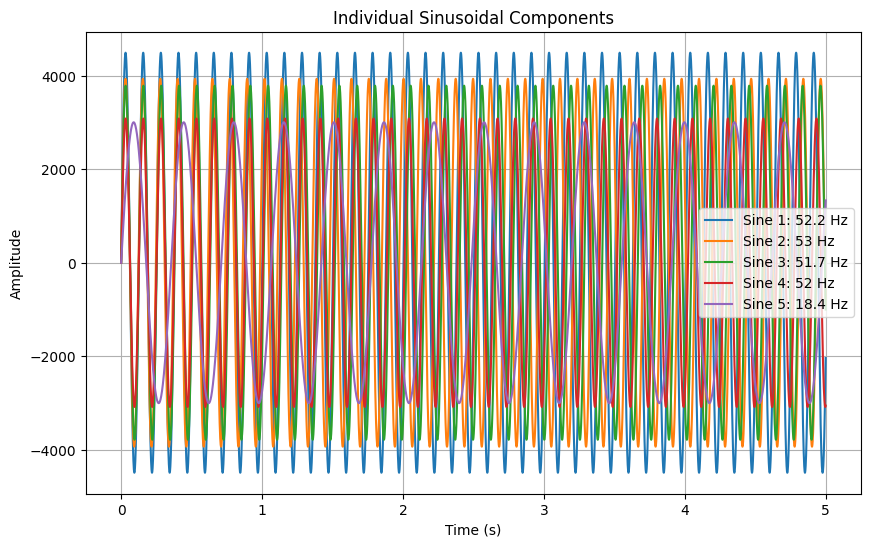

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate and FFT length
sampling_rate = 20050  # samples per second
fft_length = 131072

# Frequencies and amplitudes
frequencies = [52.2, 53, 51.7, 52, 18.4]  # Hz
amplitudes = [4489, 3932, 3784, 3083, 3002]

# Calculate frequency resolution
frequency_resolution = sampling_rate / fft_length

# Calculate angular frequencies
angular_frequencies = [2 * np.pi * f * frequency_resolution for f in frequencies]

# Time array for 5 seconds
t = np.linspace(0, 5, num=5 * sampling_rate)

# Plot individual sinusoids
plt.figure(figsize=(10, 6))

for i, (amp, omega) in enumerate(zip(amplitudes, angular_frequencies)):
    individual_sine = amp * np.sin(omega * t)
    plt.plot(t, individual_sine, label=f"Sine {i+1}: {frequencies[i]} Hz")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Individual Sinusoidal Components")
plt.legend()
plt.grid(True)
plt.show()

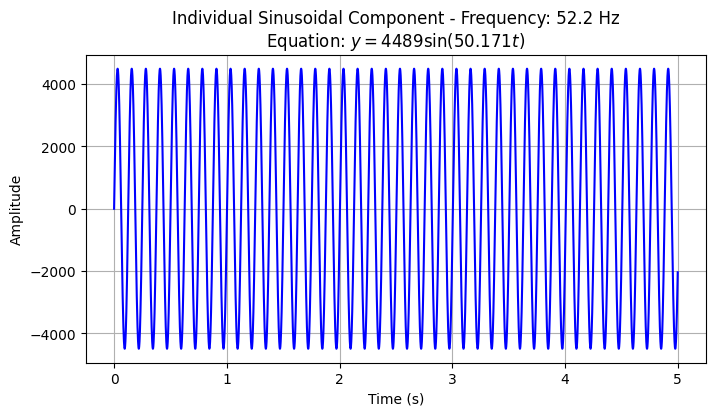

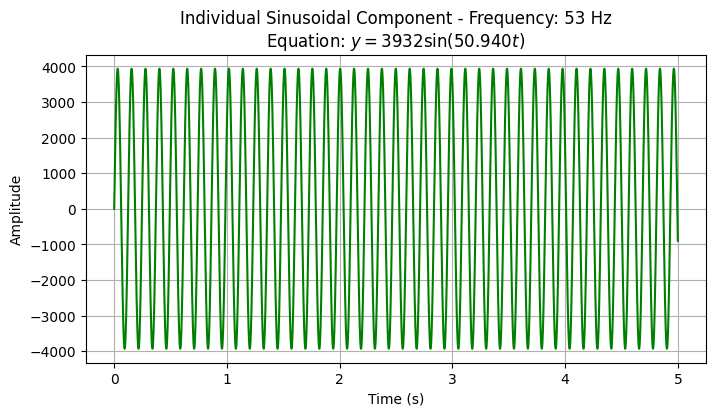

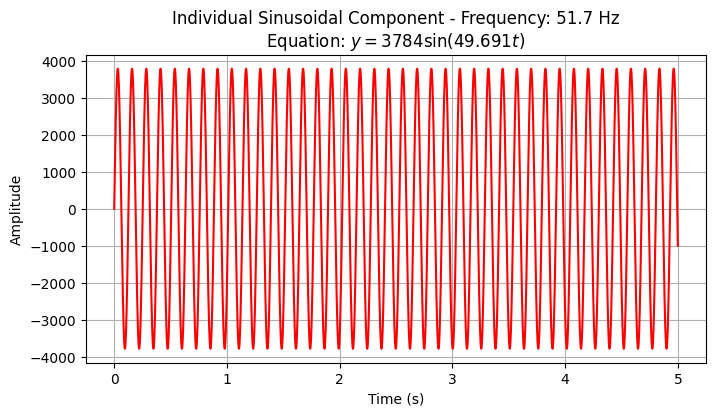

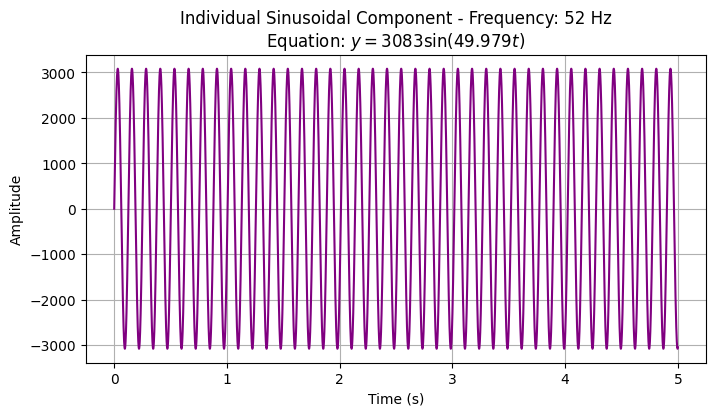

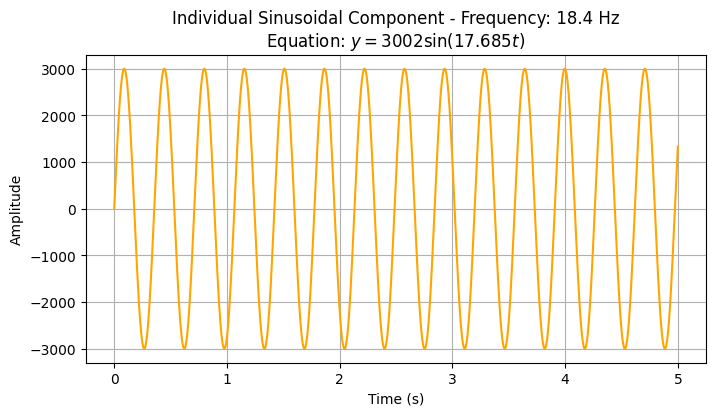

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate and FFT length
sampling_rate = 20050  # samples per second
fft_length = 131072

# Frequencies and amplitudes
frequencies = [52.2, 53, 51.7, 52, 18.4]  # Hz
amplitudes = [4489, 3932, 3784, 3083, 3002]
colors = ["blue", "green", "red", "purple", "orange"]

# Calculate frequency resolution
frequency_resolution = sampling_rate / fft_length

# Calculate angular frequencies
angular_frequencies = [2 * np.pi * f * frequency_resolution for f in frequencies]

# Time array for 5 seconds
t = np.linspace(0, 5, num=5 * sampling_rate)

# Plot individual sinusoids
for i, (amp, omega, color, freq) in enumerate(
    zip(amplitudes, angular_frequencies, colors, frequencies)
):
    individual_sine = amp * np.sin(omega * t)
    plt.figure(figsize=(8, 4))
    plt.plot(t, individual_sine, color=color)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(
        f"Individual Sinusoidal Component - Frequency: {freq} Hz\nEquation: $y = {amp} \sin({omega:.3f} t)$"
    )
    plt.grid(True)
    plt.show()

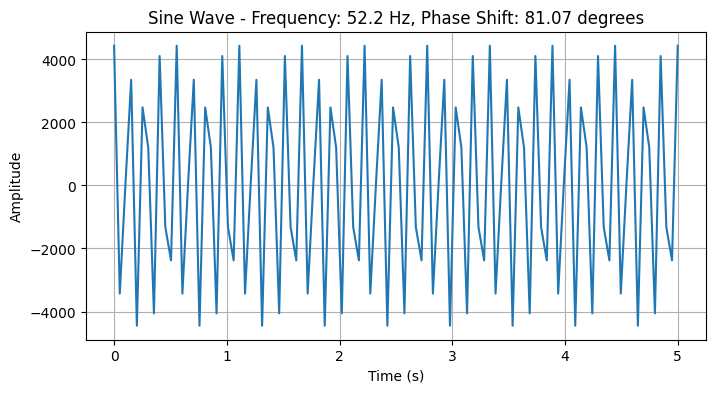

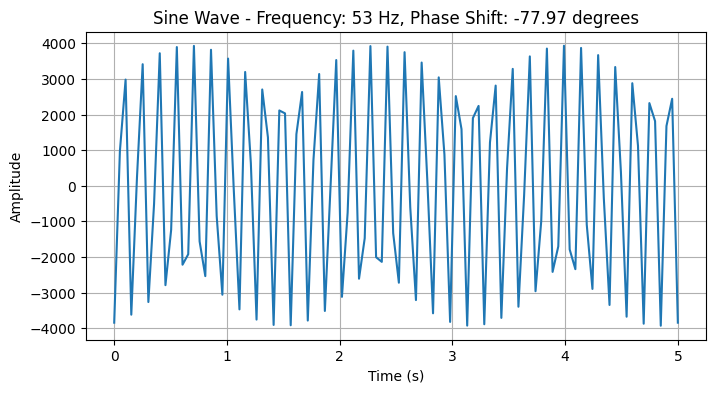

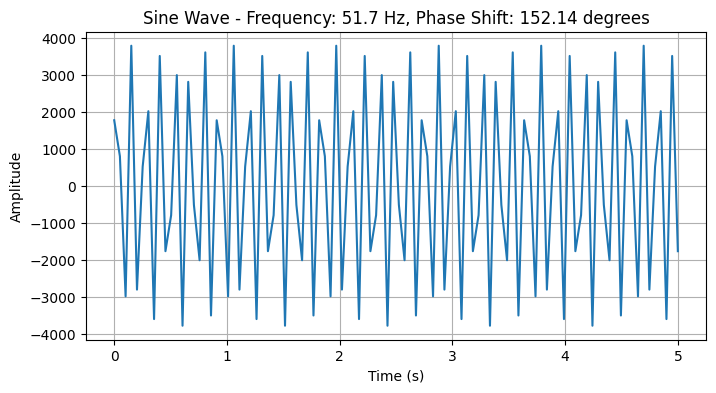

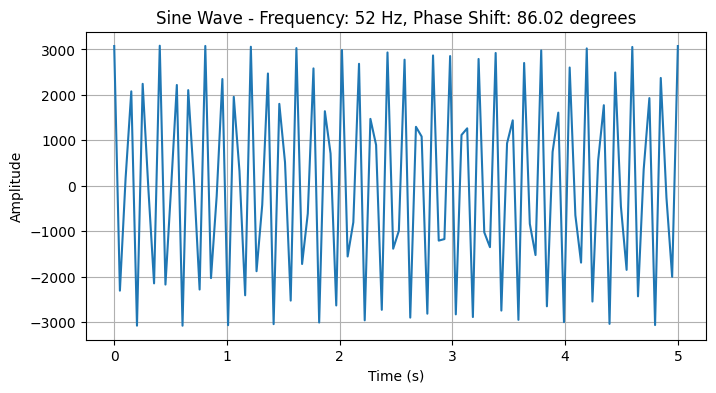

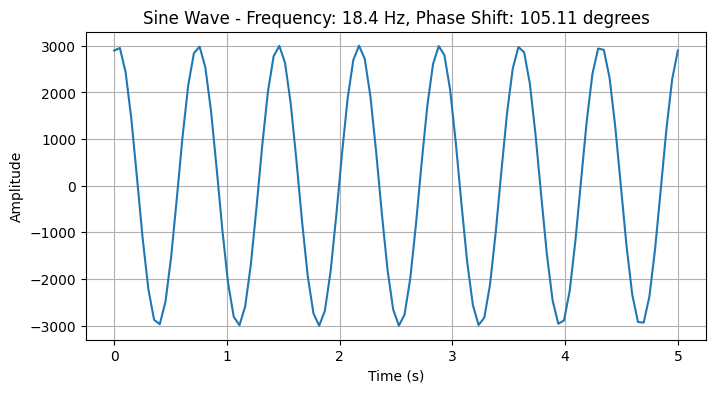

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Frequencies and complex coefficients
frequencies = [52.2, 53, 51.7, 52, 18.4]  # Hz
complex_coefficients = [
    696.810847 + 4434.265371j,
    819.366996 - 3846.330761j,
    -3345.047007 + 1768.054338j,
    213.860000 + 3075.638526j,
    -782.647236 + 2897.760732j,
]  # Example complex coefficients

# Time array for 5 seconds
t = np.linspace(0, 5, num=100)

# Plot individual sinusoids with phase shifts
for i, (coef, freq) in enumerate(zip(complex_coefficients, frequencies)):
    amplitude = np.abs(coef)
    phase_shift = np.angle(coef)
    sine_wave = amplitude * np.sin(2 * np.pi * freq * t + phase_shift)
    plt.figure(figsize=(8, 4))
    plt.plot(t, sine_wave)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(
        f"Sine Wave - Frequency: {freq} Hz, Phase Shift: {np.degrees(phase_shift):.2f} degrees"
    )
    plt.grid(True)
    plt.show()